In [18]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [19]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [42]:
import utils.network.network3 as model
from utils.metrics import metric

In [43]:
net = model.MyLstmModel()

In [44]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [45]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network3-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [46]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

===] - 12s 18ms/step - loss: 0.1140 - acc: 0.2989 - tp: 301751.0000 - fp: 6106.0000 - tn: 671470.0000 - fn: 37037.0000 - categorical_accuracy: 0.9480 - categorical_crossentropy: 0.1140 - precision: 0.9802 - recall: 0.8907 - auc: 0.9945 - val_loss: 0.0578 - val_acc: 0.3385 - val_tp: 141157.0000 - val_fp: 2702.0000 - val_tn: 287690.0000 - val_fn: 4039.0000 - val_categorical_accuracy: 0.9769 - val_categorical_crossentropy: 0.0578 - val_precision: 0.9812 - val_recall: 0.9722 - val_auc: 0.9978
Epoch 5/40
662/662 [==============================] - 12s 18ms/step - loss: 0.1111 - acc: 0.3045 - tp: 301939.0000 - fp: 5745.0000 - tn: 671831.0000 - fn: 36849.0000 - categorical_accuracy: 0.9493 - categorical_crossentropy: 0.1111 - precision: 0.9813 - recall: 0.8912 - auc: 0.9948 - val_loss: 0.0549 - val_acc: 0.3381 - val_tp: 141257.0000 - val_fp: 2694.0000 - val_tn: 287698.0000 - val_fn: 3939.0000 - val_categorical_accuracy: 0.9790 - val_categorical_crossentropy: 0.0549 - val_precision: 0.9813 - va

In [47]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  128419.0
TruePositives result:  72509.0
FalseNegatives result:  3071.0
FalsePositives result:  3423.0
Recall result:  0.9593676
Precision result:  0.9549202


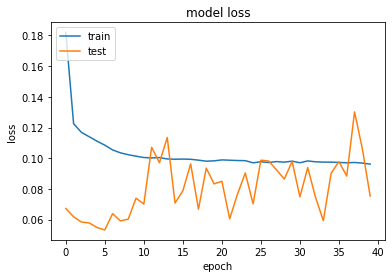

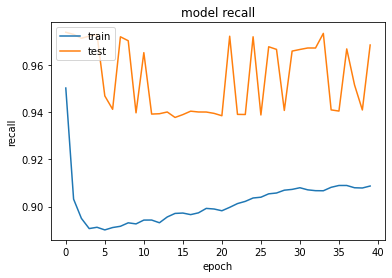

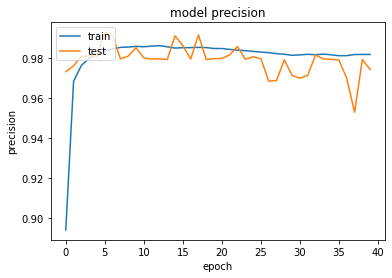

In [48]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)